In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

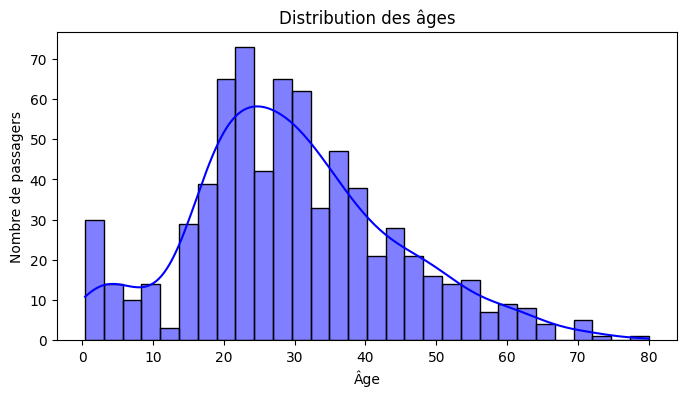

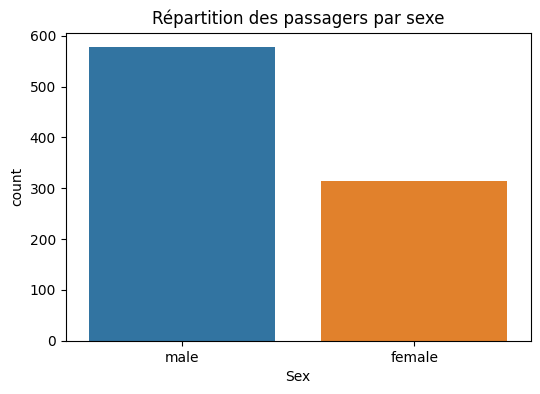

   Pclass   Age     Fare  Famille  Sex_male
0       3  22.0   7.2500        1      True
1       1  38.0  71.2833        1     False
2       3  26.0   7.9250        0     False
3       1  35.0  53.1000        1     False
4       3  35.0   8.0500        0      True


In [6]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données Titanic
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Visualisation rapide des premières lignes du jeu de données
print(data.head())

# EDA - Analyse exploratoire des données
# Statistiques descriptives
print(data.describe())

# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Visualisation des données
# Histogramme des âges
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.show()

# Diagramme à barres du sexe des passagers
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data)
plt.title('Répartition des passagers par sexe')
plt.show()

# Feature Engineering
# Remplir les valeurs manquantes de l'âge par la médiane
data['Age'].fillna(data['Age'].median(), inplace=True)

# Créer une nouvelle caractéristique "Famille" basée sur SibSp et Parch
data['Famille'] = data['SibSp'] + data['Parch']

# Encoder les variables catégorielles (par exemple, le sexe)
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)


# Sélectionner les caractéristiques pertinentes pour l'analyse
features = ['Pclass', 'Age', 'Fare', 'Famille', 'Sex_male']

# Créer un sous-ensemble de données avec les caractéristiques sélectionnées
data_subset = data[features]

# Enregistrer les données traitées
data_subset.to_csv('titanic_processed.csv', index=False)

# Afficher les premières lignes du jeu de données traité
print(data_subset.head())
